<div style = "text-align: right"><h4>Job Oriented Specialisation in Data Science</h4></div>

---
<center><h1>Ensemble Learning</h1></center>

---

## Project - Building Basic predictive models over the NYC Taxi Trip dataset.

#### You are provided with the NYC Taxi Trip Dataset. This dataset contains information about the taxi trips that took place in different parts of New York City and how much time did that trip take to complete.
#### In this project, the following are the tasks you have to complete and submit in a .zip file:
1. Build a K-Nearest neighbours model for the given dataset and find the best value of K.
2. Build a Linear model for the given dataset with regularisation.
3. Build a Random Forest model for the given dataset.
4. Build a Gradient Boosting model for the given dataset.
5. Combine all the models above using the averaging technique to generate the final predictions.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
data = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [3]:
# Checking the shape of data
data.shape

(729322, 11)

In [4]:
# Reading top five lines of the data
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Data Preprocessing

In [5]:
# Checking if there is any missing value
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
# Checking the type of each feature of dataset
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
# Converting data types
data['vendor_id'] = data['vendor_id'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [8]:
# converting strings to datetime features

data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

In [9]:
# Extracting Weekday and Hour from the datetime feature
data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [10]:
# Dropping the id, pickup_datetime and dropoff_datetime feature
data = data.drop(['pickup_datetime', 'dropoff_datetime', 'id'], axis = 1)

In [11]:
# Checking the dataframe
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,16
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4,23
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,6,17
3,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,9
4,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,6


In [12]:
# Importing the library which lets us calculate distance from geographical coordinates
from geopy.distance import great_circle

In [13]:
# Defining a function to take coordinates as inputs and return us distance
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(dropoff_lat,dropoff_long)
    return great_circle(start_coordinates,stop_coordinates).km

In [14]:
# Applying the function to our dataset and creating the feature ‘distance’.
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],
                                                     x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [15]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,distance
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,16,1.199074
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4,23,4.129117
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,6,17,7.250763
3,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,9,2.361101
4,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,6,4.328540


In [16]:
# Importing Label Encoder for converting the categorical values to numeric value
from sklearn.preprocessing import LabelEncoder

In [17]:
# Transforming each feature
le = LabelEncoder()
data['vendor_id'] = le.fit_transform(data['vendor_id'])
data['store_and_fwd_flag'] = le.fit_transform(data['store_and_fwd_flag'])

In [18]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,distance
0,1,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0,16,1.199074
1,0,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,23,4.129117
2,1,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,17,7.250763
3,1,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,9,2.361101
4,0,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,6,4.328540


### Outlier Detection and Removal

##### a. trip_duration

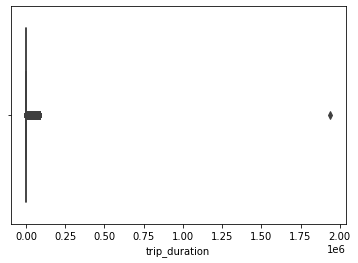

In [19]:
# Plotting the boxplot of trip_duration
sns.boxplot(data['trip_duration'])
plt.show()

As we can not visualize the boxplot due to huge outlier, we'll log transform it to visualize it better.

In [20]:
# taking log for better visualization
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)

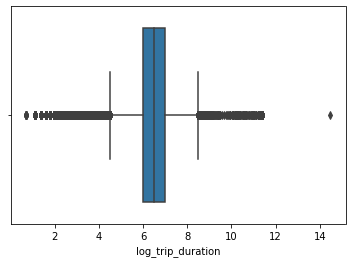

In [21]:
# Plotting the variable
sns.boxplot(data['log_trip_duration'])
plt.show()

In [22]:
# Selecting the range of log_trip_duration between 4.53 and 8.45 for outlier removal
data = data.loc[(data.log_trip_duration > 4.53) & (data.log_trip_duration < 8.45)]

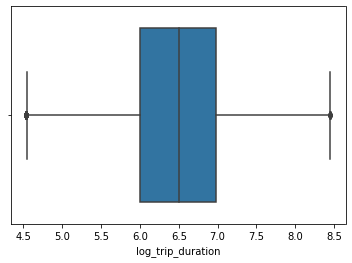

In [23]:
# Plotting the variable
sns.boxplot(data['log_trip_duration'])
plt.show()

##### b. pickup_latitude, pickup_longitude, dropoff_latitude & dropoff_longitude

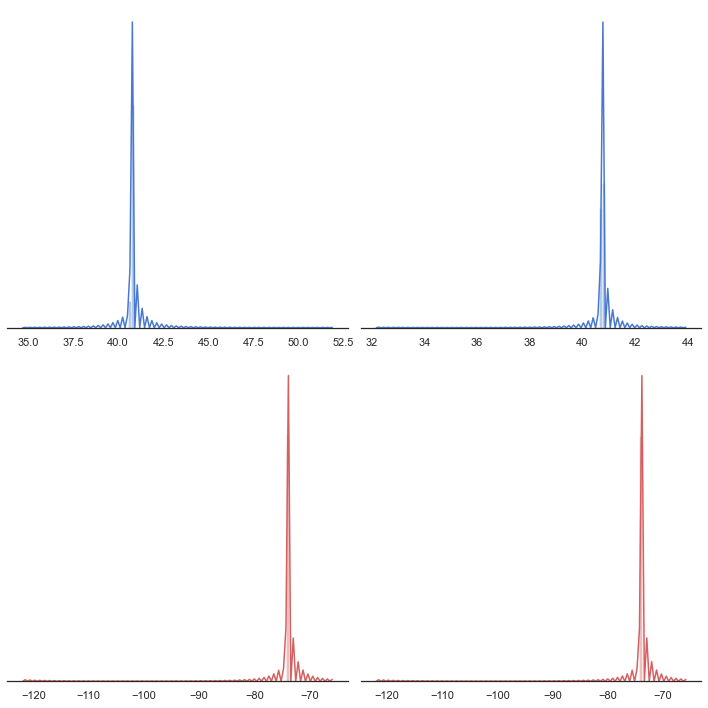

In [24]:
# Analysing Longitudes and Latitudes of the trips.

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude', color="b", bins = 100, ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude', color="r", bins =100, ax=axes[1,0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude', color="b", bins =100, ax=axes[0,1])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude', color="r", bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [25]:
# Removing Outliers

data = data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
data = data.loc[(data.dropoff_latitude>40.6) & (data.dropoff_latitude < 40.9)]
data = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
data = data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]

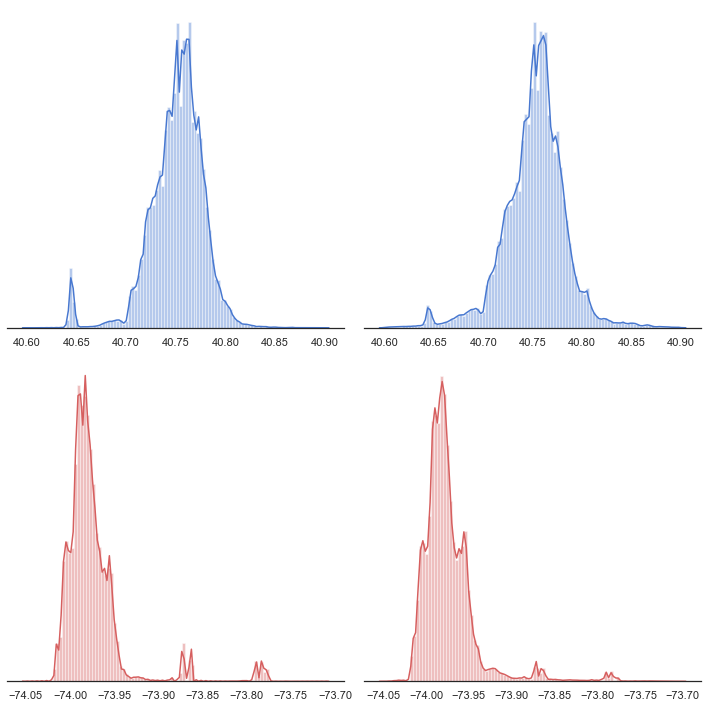

In [26]:
# Visualisation after removing outliers

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0, 0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1, 0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0, 1])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [27]:
# Dropping the log_trip_duration, dropoff_longitude and dropoff_latitude, as only pickup points are more important to find out
# the locality with higher trips.

data = data.drop(['log_trip_duration', 'dropoff_longitude', 'dropoff_latitude'], axis = 1)

---

### Q1. Build a K-Nearest neighbours model for the given dataset and find the best value of K.

In [28]:
# Reading the dataframe
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,distance
0,1,1,-73.953918,40.778873,0,400,0,16,1.199074
1,0,2,-73.988312,40.731743,0,1100,4,23,4.129117
2,1,2,-73.997314,40.721458,0,1635,6,17,7.250763
3,1,6,-73.961670,40.759720,0,1141,1,9,2.361101
4,0,1,-74.017120,40.708469,0,848,2,6,4.328540


### Segregating variables: Independent and Dependent Variables

In [29]:
#seperating independent and dependent variables

#features
x = data.drop(['trip_duration'], axis=1)

#target
y = data['trip_duration']

x.shape, y.shape

((716140, 8), (716140,))

### Scaling the data (Using MinMax Scaler)

In [30]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [31]:
# Creating the dataframe from scaled data and storing it in a variable
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,store_and_fwd_flag,day_of_week,hour_of_day,distance
0,1.0,0.111111,0.282868,0.596506,0.0,0.000000,0.695652,0.036258
1,0.0,0.222222,0.181487,0.438738,0.0,0.666667,1.000000,0.124856
2,1.0,0.222222,0.154950,0.404311,0.0,1.000000,0.739130,0.219249
3,1.0,0.666667,0.260019,0.532390,0.0,0.166667,0.391304,0.071395
4,0.0,0.111111,0.096568,0.360831,0.0,0.333333,0.260870,0.130887


In [32]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing KNN Regressor

In [33]:
# Importing KNN regressor

from sklearn.neighbors import KNeighborsRegressor as KNN

In [34]:
# Creating instance for KNN
knn = KNN()

In [35]:
# Taking the hyperparameters
parameter_grid = {
    'n_neighbors' : [19, 20, 21]
}

In [36]:
# Importing Grid Search and imputing the hyperparameters
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=knn, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=3)

In [37]:
# Fitting the train set
gridsearch.fit(train_x, train_y)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [19, 20, 21]},
             scoring='neg_mean_squared_error')

In [38]:
# Finding the best parameter combination
gridsearch.best_params_

{'n_neighbors': 20}

In [39]:
# Taking the parameters and imputing it in KNN()

# Creating instance of KNN
knn = KNN(n_neighbors = 20)

# Fitting the model
knn.fit(train_x, train_y)

# Predicting over the Train and Test Set
train_y_predict_knn = knn.predict(train_x)
test_y_predict_knn = knn.predict(test_x)

In [40]:
# Finding the model score
knn.score(test_x, test_y)

0.7136209854097857

### The best value of k or n_neighbors found out is **`20`**.

---

## Q2. Build a Linear model for the given dataset with regularisation.

In [41]:
# Reading the data
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,distance
0,1,1,-73.953918,40.778873,0,400,0,16,1.199074
1,0,2,-73.988312,40.731743,0,1100,4,23,4.129117
2,1,2,-73.997314,40.721458,0,1635,6,17,7.250763
3,1,6,-73.961670,40.759720,0,1141,1,9,2.361101
4,0,1,-74.017120,40.708469,0,848,2,6,4.328540


In [42]:
# seperating independent and dependent variables

# Features
x = data.drop(['trip_duration'], axis=1)

# Target
y = data['trip_duration']

x.shape, y.shape

((716140, 8), (716140,))

In [43]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [44]:
# Importing linear regression
from sklearn.linear_model import LinearRegression

In [45]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LinearRegression(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [46]:
# Predicting over train and test dataset
train_y_pred_linear_regression = lr.predict(train_x)
test_y_pred_linear_regression = lr.predict(test_x)

In [47]:
# Calculating the score on test dataset
lr.score(test_x, test_y)

0.5949312564995468

### Regularisation using Lasso

In [48]:
# Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [49]:
# Creating the instance for lasso
lasso= Lasso(normalize = True)

In [50]:
# Defining the values of alpha for hyperparameter tuning
parameter_grid = {'alpha' : [1e-12, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10]}

In [51]:
# Importing Grid Search
from sklearn.model_selection import GridSearchCV

In [52]:
# Imputing the hyperparametrs into Grid Search
gridsearch = GridSearchCV(estimator= lasso, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=3)

In [53]:
# Fitting the train data
gridsearch.fit(train_x, train_y)

GridSearchCV(cv=3, estimator=Lasso(normalize=True),
             param_grid={'alpha': [1e-12, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10]},
             scoring='neg_mean_squared_error')

In [54]:
# Taking the best parameter
gridsearch.best_params_

{'alpha': 0.0001}

In [55]:
# Imputing the best paramter of alpha in lasso model
lasso= Lasso(alpha = 0.0001, normalize = True)

In [56]:
# Fitting the train data and predicting over the test data
lasso.fit(train_x, train_y)

train_y_pred_lasso = lasso.predict(train_x)
test_y_pred_lasso = lasso.predict(test_x)

In [57]:
# Finding out the model score
lasso.score(test_x, test_y)

0.5949314420256786

---

## Q3. Build a Random Forest model for the given dataset.

In [58]:
# Data is already loded and cleaned, let's check the data
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,distance
0,1,1,-73.953918,40.778873,0,400,0,16,1.199074
1,0,2,-73.988312,40.731743,0,1100,4,23,4.129117
2,1,2,-73.997314,40.721458,0,1635,6,17,7.250763
3,1,6,-73.961670,40.759720,0,1141,1,9,2.361101
4,0,1,-74.017120,40.708469,0,848,2,6,4.328540


### Separating independent and dependent variables.

In [59]:
# Independent variables
x = data.drop(['trip_duration'], axis=1)

# Dependent variable
y = data['trip_duration']

### Creating the train and test dataset

In [60]:
# Importing the train-test split
from sklearn.model_selection import train_test_split

In [61]:
# Divide into train and test sets
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 101)

### Building a Random Forest Model

In [62]:
# Importing random forest classifier 
from sklearn.ensemble import RandomForestRegressor

In [63]:
# Creating a random forest instance
regressor = RandomForestRegressor(random_state=96)

In [64]:
# Taking the hyperparameters and their values in a dictionary
parameter_grid = {'max_depth' : [13, 14],
                 'n_estimators': [90,100]}

In [65]:
# Importing Randomized Search
from sklearn.model_selection import RandomizedSearchCV

In [66]:
# Imputing the parameter values taken into Randomized Search
randomsearch = RandomizedSearchCV(estimator=regressor, param_distributions = parameter_grid, n_iter= 6, cv=3)

In [67]:
# Train the model
randomsearch.fit(train_x,train_y)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=96),
                   n_iter=6,
                   param_distributions={'max_depth': [13, 14],
                                        'n_estimators': [90, 100]})

In [68]:
# Taking the combination of best parameters
randomsearch.best_params_

{'n_estimators': 100, 'max_depth': 14}

In [69]:
# Creating a random forest instance
regressor = RandomForestRegressor(max_depth = 14, random_state=96, n_estimators = 100)

In [70]:
# Fitting the training data into Random Forest model
regressor.fit(train_x, train_y)

RandomForestRegressor(max_depth=14, random_state=96)

In [71]:
# Predicting over train and test dataset
train_y_pred_random_forest = regressor.predict(train_x)
test_y_pred_random_forest = regressor.predict(test_x)

In [72]:
# Score on training data
regressor.score(train_x, train_y)

0.7843089578963401

In [73]:
# Score on test data
regressor.score(test_x, test_y)

0.7323634764427405

In [74]:
# Feature importance
regressor.feature_importances_

array([1.05677290e-03, 2.64375022e-03, 2.93983109e-02, 2.71613979e-02,
       2.78316278e-04, 3.23962648e-02, 8.31253946e-02, 8.23939792e-01])

In [75]:
# Feature importance against each variable
pd.Series(regressor.feature_importances_, index=train_x.columns)

vendor_id             0.001057
passenger_count       0.002644
pickup_longitude      0.029398
pickup_latitude       0.027161
store_and_fwd_flag    0.000278
day_of_week           0.032396
hour_of_day           0.083125
distance              0.823940
dtype: float64

---

## Q4. Build a Gradient Boosting model for the given dataset.

In [76]:
# Reading the data
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,distance
0,1,1,-73.953918,40.778873,0,400,0,16,1.199074
1,0,2,-73.988312,40.731743,0,1100,4,23,4.129117
2,1,2,-73.997314,40.721458,0,1635,6,17,7.250763
3,1,6,-73.961670,40.759720,0,1141,1,9,2.361101
4,0,1,-74.017120,40.708469,0,848,2,6,4.328540


### Separating independent and dependent variables.

In [77]:
# Independent variables
x = data.drop(['trip_duration'], axis=1)

# Dependent variable
y = data['trip_duration']

### Creating the train and test dataset

In [78]:
# Import the train-test split
from sklearn.model_selection import train_test_split

In [79]:
# Divide into train and test sets
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 101)

### Building an GBDT Model

In [80]:
# Importing GBDT Resgressor 
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
# Creating an Gradient boosting instance
gbr = GradientBoostingRegressor(random_state=96)

In [82]:
# Taking the hyperparameters and their values in a dictionary
parameter_grid = {'max_depth' : [8, 9, 10],
                 'n_estimators': [80, 100]}

In [83]:
# Importing Grid Search
from sklearn.model_selection import GridSearchCV

In [84]:
# Imputing the hyperparametrs into Grid Search
gridsearch = GridSearchCV(estimator= gbr, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=3)

In [85]:
# Fitting the train set in gridsearch
gridsearch.fit(train_x, train_y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=96),
             param_grid={'max_depth': [8, 9, 10], 'n_estimators': [80, 100]},
             scoring='neg_mean_squared_error')

In [86]:
# Taking the best parameter
gridsearch.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [87]:
# Creating an Gradient boosting instance
gbr = GradientBoostingRegressor(max_depth = 9, random_state=96, n_estimators = 100)

In [88]:
# Training the model
gbr.fit(train_x,train_y)

GradientBoostingRegressor(max_depth=9, random_state=96)

In [89]:
# Predicting over train and test dataset
train_y_pred_grad_boost = gbr.predict(train_x)
test_y_pred_grad_boost = gbr.predict(test_x)

In [90]:
# Calculating score on test data
gbr.score(test_x, test_y)

0.7390459707013213

---

## Q5. Combine all the models above using the averaging technique to generate the final predictions.

In [91]:
# Taking mean of all the models i.e, the final prediction and storing it in an array

from statistics import mean
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mean([test_y_predict_knn[i],
                                             test_y_pred_linear_regression[i],
                                             test_y_pred_random_forest[i],
                                             test_y_pred_grad_boost[i]]))

In [92]:
# Importing R2 score.
from sklearn.metrics import r2_score

In [93]:
# Calculating r2 score
r2_score(test_y, final_pred)

0.3996863295145331